<a href="https://colab.research.google.com/github/mekala89/hello-world/blob/master/Copy_of_ds2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving weather.xlsx to weather.xlsx


In [0]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded['weather.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
print(df)

    rid   Outlook Temperature Humidity   Wind Play
0     0     Rainy         Hot     High  False   No
1     1     Rainy         Hot     High   True   No
2     2  Overcast         Hot     High  False  Yes
3     3     Sunny        Mild     High  False  Yes
4     4     Sunny        Cool   Normal  False  Yes
5     5     Sunny        Cool   Normal   True   No
6     6  Overcast        Cool   Normal   True  Yes
7     7     Rainy        Mild     High  False   No
8     8     Rainy        Cool   Normal  False  Yes
9     9     Sunny        Mild   Normal  False  Yes
10   10     Rainy        Mild   Normal   True  Yes
11   11  Overcast        Mild     High   True  Yes
12   12  Overcast         Hot   Normal  False  Yes
13   13     Sunny        Mild     High   True   No


In [6]:
def trans(x):
  if x=='Rainy':
    return 1
  elif x=='Overcast':
    return 2
  else:
    return 3
df['Outlook']=df['Outlook'].apply(trans)
df

,rid,Outlook,Temperature,Humidity,Wind,Play
0,0,1,Hot,High,False,No
1,1,1,Hot,High,True,No
2,2,2,Hot,High,False,Yes
3,3,3,Mild,High,False,Yes
4,4,3,Cool,Normal,False,Yes
5,5,3,Cool,Normal,True,No
6,6,2,Cool,Normal,True,Yes
7,7,1,Mild,High,False,No
8,8,1,Cool,Normal,False,Yes
9,9,3,Mild,Normal,False,Yes


In [7]:
def trans1(x):
  if x=='Hot':
    return 1
  elif x=='Mild':
    return 2
  else:
    return 3
df['Temperature']=df['Temperature'].apply(trans1)
df

,rid,Outlook,Temperature,Humidity,Wind,Play
0,0,1,1,High,False,No
1,1,1,1,High,True,No
2,2,2,1,High,False,Yes
3,3,3,2,High,False,Yes
4,4,3,3,Normal,False,Yes
5,5,3,3,Normal,True,No
6,6,2,3,Normal,True,Yes
7,7,1,2,High,False,No
8,8,1,3,Normal,False,Yes
9,9,3,2,Normal,False,Yes


In [8]:
def trans2(x):
  if x=='High':
    return 1
  else:
    return 2
df['Humidity']=df['Humidity'].apply(trans2)
df

,rid,Outlook,Temperature,Humidity,Wind,Play
0,0,1,1,1,False,No
1,1,1,1,1,True,No
2,2,2,1,1,False,Yes
3,3,3,2,1,False,Yes
4,4,3,3,2,False,Yes
5,5,3,3,2,True,No
6,6,2,3,2,True,Yes
7,7,1,2,1,False,No
8,8,1,3,2,False,Yes
9,9,3,2,2,False,Yes


In [9]:
X=df.iloc[:,1:-1]
print(X)

    Outlook  Temperature  Humidity   Wind
0         1            1         1  False
1         1            1         1   True
2         2            1         1  False
3         3            2         1  False
4         3            3         2  False
5         3            3         2   True
6         2            3         2   True
7         1            2         1  False
8         1            3         2  False
9         3            2         2  False
10        1            2         2   True
11        2            2         1   True
12        2            1         2  False
13        3            2         1   True


In [10]:
Y=df.iloc[:,-1]
print(Y)

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#model parameters can be seen through below code
dt.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:

# to fine tune these models get the optimal value to have accuracy
import numpy as np
from sklearn import metrics
max_depth=np.linspace(1,10,10)
train_results=[]
test_results=[]
for depth in max_depth:
  dt=DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train,y_train)
  ty_pred=dt.predict(x_train)
  acc_train=metrics.accuracy_score(y_train,ty_pred)*100
  #print("Decision Tree accuracy in %:",metrics.accuracy_score(y_test,y_pred)*100)
  train_results.append(acc_train)
  y_pred=dt.predict(x_test)
  acc_test=metrics.accuracy_score(y_test,y_pred)*100
  test_results.append(acc_test)
print(train_results)
print(test_results)


[75.0, 87.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[66.66666666666666, 33.33333333333333, 66.66666666666666, 16.666666666666664, 50.0, 16.666666666666664, 66.66666666666666, 50.0, 16.666666666666664, 66.66666666666666]


In [52]:
# to fine tune these models get the optimal value to have accuracy min_samples_split
import numpy as np
from sklearn import metrics
min_samples_split=np.linspace(0.1,1.0,10)
train_results=[]
test_results=[]
for min_sample in min_samples_split:
  dt=DecisionTreeClassifier(max_depth=1,min_samples_split=min_sample)
  dt.fit(x_train,y_train)
  ty_pred=dt.predict(x_train)
  acc_train=metrics.accuracy_score(y_train,ty_pred)*100
  #print("Decision Tree accuracy in %:",metrics.accuracy_score(y_test,y_pred)*100)
  train_results.append(acc_train)
  y_pred=dt.predict(x_test)
  acc_test=metrics.accuracy_score(y_test,y_pred)*100
  test_results.append(acc_test)
print(train_results)
print(test_results)

[75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0]
[66.66666666666666, 50.0, 66.66666666666666, 50.0, 66.66666666666666, 50.0, 50.0, 66.66666666666666, 50.0, 66.66666666666666]


In [56]:
dt=DecisionTreeClassifier(max_depth=1,min_samples_split=0.1)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [57]:
from sklearn import metrics
print("Decision Tree accuracy in %:",metrics.accuracy_score(y_test,y_pred)*100)

Decision Tree accuracy in %: 66.66666666666666


In [55]:
#to check with data wheter problem with data training accuracy
dt.fit(x_train,y_train)
ty_pred=dt.predict(x_train)
print("Decision Tree accuracy in %:",metrics.accuracy_score(y_train,ty_pred)*100)

Decision Tree accuracy in %: 75.0


# Gaussian Naive bayes

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [0]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred=g.predict(x_test)
y_pred

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'], dtype='<U3')

In [0]:
y_test

3     Yes
7      No
6     Yes
2     Yes
10    Yes
4     Yes
Name: Play, dtype: object

In [0]:
from sklearn import metrics
print("GaussianNB accuracy"),metrics.accuracy_score(y_test,y_pred)

GaussianNB accuracy


(None, 0.6666666666666666)

In [0]:
from sklearn.metrics import confusion_matrix


[[0 1]
 [1 4]]


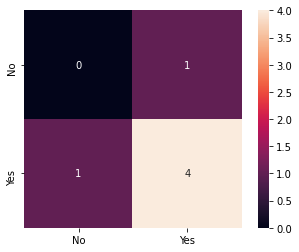

In [0]:
mat=confusion_matrix(y_pred,y_test)
import seaborn as sns
import numpy as np
print(mat)
names=np.unique(y_pred)
sns.heatmap(mat,square=True,xticklabels=names,yticklabels=names,annot=True)

In [0]:
mat[0,0]

0

In [0]:
for x in mat:
  for y in x:
    print(y)


0
1
1
4


In [0]:
from google.colab import files
uploaded = files.upload()

Saving gradecalculation.xlsx to gradecalculation.xlsx


In [0]:
import io
import pandas as pd
df2 = pd.read_excel(io.BytesIO(uploaded['gradecalculation.xlsx']))

In [0]:
df2

,Time_spent,Grade
0,6,82
1,10,88
2,2,56
3,4,64
4,6,77
5,7,92
6,0,23
7,1,41
8,8,80
9,5,59


In [0]:
from sklearn.model_selection import train_test_split

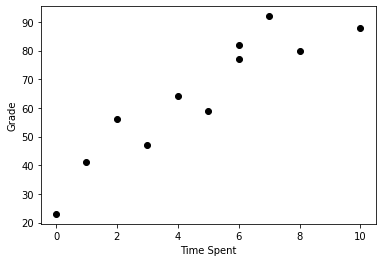

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as ans
X=df2["Time_spent"]
Y=df2["Grade"]
# Plot outputs
plt.scatter(X,Y,  color='black')
#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel("Time Spent")
plt.ylabel("Grade")
#plt.xticks(())
#plt.yticks(())
plt.show()

In [0]:
X=np.array(df2["Time_spent"]).reshape(-1,1)
Y=np.array(df2["Grade"]).reshape(-1,1)
X
Y

array([[82],
       [88],
       [56],
       [64],
       [77],
       [92],
       [23],
       [41],
       [80],
       [59],
       [47]])

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=1)
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
print(y_pred,y_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

[[ 43.55927052]
 [ 59.50455927]
 [ 75.44984802]
 [ 67.47720365]
 [107.34042553]] [[56]
 [64]
 [77]
 [59]
 [88]]
Coefficients: 
 [[7.97264438]]
Mean squared error: 124.66
Coefficient of determination: 0.13
